In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import email

In [2]:
ham_files = os.listdir('/kaggle/input/ham-and-spam-dataset/ham/')
spam_files = os.listdir('/kaggle/input/ham-and-spam-dataset/spam/')

In [3]:
def load_email(path, filename):
    with open(os.path.join(path, filename), 'rb') as file:
          email_file = email.parser.BytesParser(policy=email.policy.default).parse(file)
    return email_file

ham_emails = [load_email('/kaggle/input/ham-and-spam-dataset/ham/', filename) for filename in ham_files]
spam_emails = [load_email('/kaggle/input/ham-and-spam-dataset/spam/', filename) for filename in spam_files]

In [7]:
spam_df = []
for email in spam_emails:
    try:
        if email.get_content_type() == 'text/plain':
            content = email.get_content()
            spam_df.append(content)
    except LookupError:
        pass
spam_df = pd.DataFrame(spam_df, columns = ['Content'])
spam_df['Label'] = 0

In [9]:
spam_df[:10]

,Content,Label
0,###################################\n\n FREE ...,0
1,����������������������������\n���������������R...,0
2,"\n Socijalisticka partija Srbije, predvo...",0
3,Whiter teeth and a brighter smile are just a c...,0
4,When America's top companies compete for your ...,0
5,Dear Sir / Madam\n\nIf you are fed up of being...,0
6,Lowest rates available for term life insurance...,0
7,FROM: COL. MICHAEL BUNDU. \nDEMOCRATIC REPUBLI...,0
8,Would you like to know what the Powerball Winn...,0
9,1) Fight The Risk of Cancer!\nhttp://www.adcli...,0


In [10]:
ham_df = []
for email in ham_emails:
    try:
        if email.get_content_type() == 'text/plain':
            content = email.get_content()
            ham_df.append(content)
    except LookupError:
        pass
ham_df = pd.DataFrame(ham_df, columns = ['Content'])
ham_df['Label'] = 1

In [14]:
df = pd.concat([ham_df,spam_df], axis=0)
# df = df.sample(frac=1)

In [15]:
df.head()

,Content,Label
0,Chuck Murcko wrote:\n> > The usual crud. Why ...,1
1,URL: http://scriptingnews.userland.com/backiss...,1
2,"Once upon a time, rob wrote :\n\n> I dl'd gcc...",1
3,"Date: Fri, 23 Aug 2002 02:05:19 +07...",1
4,"An apparent quote from Dubya, from the Times (...",1


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Content'], df['Label'], random_state=42)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix

score 0.953662182361734


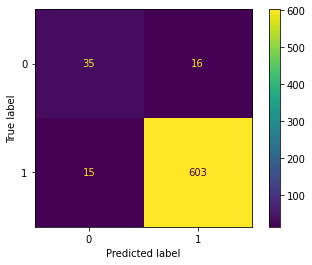

In [30]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print("score",clf.score(X_test, y_test))
plot_confusion_matrix(clf,X_test, y_test)
